# Bell's theorem and Bell test experiments
\
Classical example:
\
a, b two objects(qubits)
\
0, 1 two properties(observalbes)
\
property 0: 1 or -1
\
property 1: 1 or -1
\
Imaging we have a function:
$$F(a,b)=a_0 b_0 + a_0 b_1 + a_1 b_0 - a_1 b_1 = (a_0 + a_1)b_0 + (a_0 - a_1)b_1$$
And this function can be proved that for any observables, we always have:
$$F(a,b) <= 2$$

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorEstimator as Estimator
import matplotlib.pyplot as plt

In [2]:
def F (a0,a1,b0,b1):
    return (a0+a1)*b0 + (a0-a1)*b1

In [3]:
inputL = [ [2*i-1,2*j-1,2*k-1,2*l-1] for i in range(2) for j in range(2) for k in range(2) for l in range(2) ]

In [4]:
res = []
for i in inputL:
    res.append(F(i[0],i[1],i[2],i[3]))

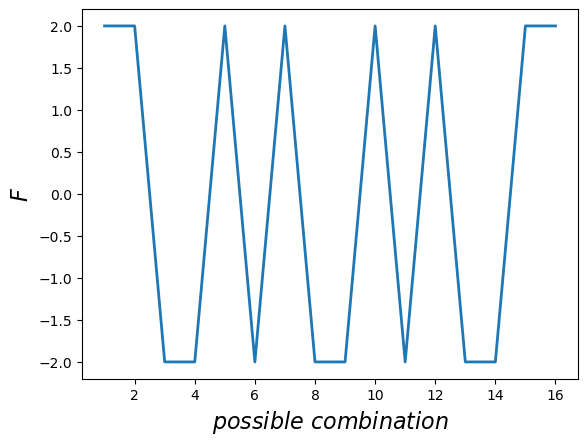

In [5]:
fig, ax = plt.subplots()
ax.plot(range(1,len(res)+1), res, linewidth=2.0)
plt.xlabel(r'$possible \ combination$',fontsize=16)
plt.ylabel(r'$F$',fontsize=16)
plt.show()

In quantum case, F can be larger that 2. Let's understand why.

In a real experiment:
- Alice and Bob are separated (maybe by kilometers)
- They each get one particle from the entangled pair
- Alice chooses randomly: "Should I measure A0 or A1?"
- Bob chooses randomly: "Should I measure B0 or B1?"
- They measure simultaneously and record ±1 results
- They repeat this thousands of times with fresh entangled pairs
- They compare results to calculate correlations

The quantum magic: Even though Alice and Bob choose their measurements randomly and independently, the entangled state creates correlations that violate F ≤ 2, proving that quantum mechanics is fundamentally non-local!


When you measure a quantum state with an operator (matrix), you get:
- A random result (±1 for these operators)
- The probability of each result depends on the quantum state
- The expectation value is the average result over many measurements.

The matrices represent the measurement apparatus - like the angle you set on a polarizer or the magnetic field direction in a Stern-Gerlach device.

In [6]:
# Alice's measurements (chooses either A0 or A1)
A0 = np.array([[1,0],[0,-1]])
A1 = np.array([[0,1],[1,0]])

# Bob's measurements (chooses either B0 or B1)
B0 = -(A0+A1)/np.sqrt(2)
B1 = (A1-A0)/np.sqrt(2)

The following describes a quantum superposition of two qubits.
What |01⟩ and |10⟩ mean:
- |01⟩: First qubit is in state |0⟩, second qubit is in state |1⟩
- |10⟩: First qubit is in state |1⟩, second qubit is in state |0⟩
- The superposition:
(|01⟩ - |10⟩)/√2 means the two-qubit system is in a quantum superposition where:
    - It's 50% in state |01⟩ and 50% in state |10⟩.
    - The minus sign creates a specific phase relationship
    - The 1/√2 ensures proper normalization (probabilities sum to 1).

In [7]:
psi = np.array([0,1,-1,0])/np.sqrt(2) 

Alice picks: A0 or A1
Bob picks: B0 or B1
This gives 4 possible combinations: (A0,B0), (A0,B1), (A1,B0), (A1,B1).
The following cell calculates the expectation values for each combination

In [8]:
psi.T@np.kron(B0,A0)@psi+psi.T@np.kron(B0,A1)@psi+psi.T@np.kron(B1,A0)@psi-psi.T@np.kron(B1,A1)@psi

np.float64(2.8284271247461894)

What does each term mean?
Mathematical Meaning:
This computes: ⟨ψ|B₀⊗A₀|ψ⟩

Where:
- ⟨ψ| = psi.T (bra vector - transpose of psi)
- B₀⊗A₀ = np.kron(B0,A0) (tensor product of measurement operators)
- |ψ⟩ = psi (ket vector - the Bell state)

Physical Meaning:
This represents the correlation between Alice and Bob when:

- Bob measures with operator B₀ on his qubit
- Alice measures with operator A₀ on her qubit
- Simultaneously on the entangled Bell state

What the Result Tells Us:
The result is a number between -1 and +1 that represents:
- +1: Perfect positive correlation (when Alice gets +1, Bob always gets +1)
- -1: Perfect negative correlation (when Alice gets +1, Bob always gets -1)
- 0: No correlation (Alice's result tells us nothing about Bob's)

np.kron(B0,A0) represents the joint measurement where:
- Bob measures with B0 on his qubit
- Alice measures with A0 on her qubit
- Simultaneously

# Handin
\
Please build a quantum circuit to present the Bell test.